In [1]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
with Path("../11.in").open() as file:
    data = file.read().strip().splitlines()


In [3]:
testdata = """\
...#......
.......#..
#.........
..........
......#...
.#........
.........#
..........
.......#..
#...#.....""".splitlines()

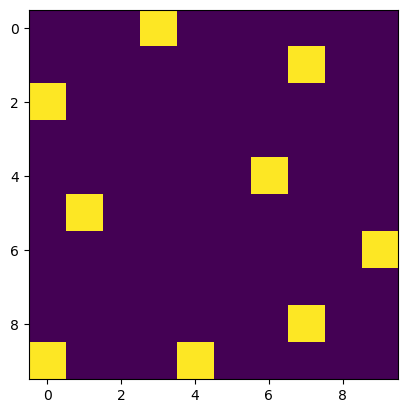

In [4]:
def parse(data):
    return np.array([[int(c == "#") for c in line] for line in data])


image = parse(testdata)
plt.imshow(image)

## Part I - Expansion by `1`

In [5]:
def get_galaxies_after_expansion(image, expansions=2):
    cols_to_expand = np.argwhere(np.all(image == 0, axis=0)).flatten()
    rows_to_expand = np.argwhere(np.all(image == 0, axis=1)).flatten()
    # print(f"Cols to expand: {cols_to_expand}")
    # print(f"Rows to expand: {rows_to_expand}")

    galaxy_positions = np.argwhere(image == 1)
    # print(f"Galaxy Positions:\n{galaxy_positions}")

    expanded_positions = []

    for y, x in galaxy_positions:
        if y < min(rows_to_expand):
            ny = y
        else:
            # count the number of rows to expand
            to_expand = np.count_nonzero(y > rows_to_expand)
            ny = y + (expansions - 1) * to_expand
        if x < min(cols_to_expand):
            nx = x
        else:
            # count the number of cols to expand
            to_expand = np.count_nonzero(x > cols_to_expand)
            nx = x + (expansions - 1) * to_expand

        expanded_positions.append((ny, nx))

    expanded_positions = np.array(expanded_positions)
    # print(f"Expanded Positions:\n{expanded_positions}")

    return expanded_positions


In [6]:
def get_pairwise_distance(galaxies):
    # Since we cannot go diagonally, the distance can be calculated as
    # the sum of the vertical and horizontal distance.
    distances = []
    for i, (y1, x1) in enumerate(galaxies, start=1):
        for j, (y2, x2) in enumerate(galaxies, start=1):
            if j <= i:
                continue
            d = abs(y1 - y2) + abs(x1 - x2)
            distances.append((i, j, d))
    return distances

pairwise_distances = get_pairwise_distance(get_galaxies_after_expansion(image))

In [7]:
def solve1(data):
    image = parse(data)
    galaxies = get_galaxies_after_expansion(image)
    distances = get_pairwise_distance(galaxies)
    total_distance = sum(d for _, _, d in distances)
    return total_distance

assert solve1(testdata) == 374

In [8]:
solve1(data)

9599070

## Part II - Expansion by `1_000_000`

In [9]:
def solve2(data, expansions=1_000_000):
    image = parse(data)
    galaxies = get_galaxies_after_expansion(image, expansions=expansions)
    distances = get_pairwise_distance(galaxies)
    total_distance = sum(d for _, _, d in distances)
    return total_distance

assert solve2(testdata, expansions=10) == 1030
assert solve2(testdata, expansions=100) == 8410


In [10]:
solve2(data, expansions=1_000_000)

842645913794